# 🚗 중고차 가격 예측 모델 실습 보고서


---

## 📋 프로젝트 개요

### 🎯 목적
UAE의 중고차 거래 플랫폼 **Dubizzle** 데이터를 활용하여 중고차 가격을 예측하는 머신러닝 모델을 개발하고 성능을 분석합니다.

### 📊 사용 데이터
- **파일명**: `Dubizzle_used_car_sales.csv`
- **출처**: UAE 중고차 거래 플랫폼 Dubizzle
- **주요 변수**: 브랜드, 모델, 연식, 주행거리, 가격, 차체타입, 연료타입 등

### 🔬 분석 방법론
- **모델**: 선형회귀, Ridge, Lasso, ElasticNet, 다항회귀
- **전처리**: 결측값 처리, 라벨 인코딩, 표준화
- **평가지표**: MAE, MSE, RMSE, R² Score

### 📈 기대 성과
- 중고차 가격 예측 정확도 80% 이상 달성
- 가격 결정 주요 요인 분석
- 실무 활용 가능한 예측 모델 구축

## 📦 1. 라이브러리 임포트 및 환경 설정

In [5]:
# 데이터 분석 및 조작을 위한 기본 라이브러리
import pandas as pd              # 데이터프레임 조작
import numpy as np               # 수치 연산
import matplotlib.pyplot as plt  # 그래프 생성
import seaborn as sns            # 통계 시각화

# 머신러닝 모델 및 전처리
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (그래프에서 한글 깨짐 방지)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 8)

# 출력 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ 모든 라이브러리가 성공적으로 임포트되었습니다!")
print(f"📍 현재 작업 디렉토리: C:\\githome\\9-11week_py_statistics")
print(f"📊 pandas 버전: {pd.__version__}")
print(f"🔢 numpy 버전: {np.__version__}")

✅ 모든 라이브러리가 성공적으로 임포트되었습니다!
📍 현재 작업 디렉토리: C:\githome\9-11week_py_statistics
📊 pandas 버전: 2.3.1
🔢 numpy 버전: 2.1.3


## 📁 2. 데이터 로딩 및 기본 탐색

UAE 중고차 거래 데이터를 로딩하고 기본적인 데이터 구조를 파악합니다.

In [6]:
# 데이터 로딩
print("📂 데이터 로딩 중...")
try:
    df = pd.read_csv('data1/Dubizzle_used_car_sales.csv', encoding='utf-8')
    print("✅ 데이터 로딩 성공!")
except Exception as e:
    print(f"❌ 데이터 로딩 실패: {e}")
    print("💡 data1 폴더에 Dubizzle_used_car_sales.csv 파일이 있는지 확인해주세요.")

# 데이터 기본 정보
print("\n" + "="*60)
print("📊 데이터 기본 정보")
print("="*60)
print(f"📏 데이터 크기: {df.shape}")
print(f"📋 총 행 수: {df.shape[0]:,}개")
print(f"📋 총 열 수: {df.shape[1]}개")
print(f"💾 메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📋 컬럼 목록:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

📂 데이터 로딩 중...
✅ 데이터 로딩 성공!

📊 데이터 기본 정보
📏 데이터 크기: (9970, 20)
📋 총 행 수: 9,970개
📋 총 열 수: 20개
💾 메모리 사용량: 10.25 MB

📋 컬럼 목록:
 1. title
 2. price_in_aed
 3. kilometers
 4. body_condition
 5. mechanical_condition
 6. seller_type
 7. body_type
 8. no_of_cylinders
 9. transmission_type
10. regional_specs
11. horsepower
12. fuel_type
13. steering_side
14. year
15. color
16. emirate
17. motors_trim
18. company
19. model
20. date_posted


In [7]:
# 데이터 타입 및 상세 정보
print("📋 데이터 타입 및 결측값 정보")
print("="*70)
df.info()

print("\n" + "="*70)
print("🔍 데이터 미리보기 (상위 5행)")
print("="*70)
display(df.head())

print("\n" + "="*70)
print("🔍 데이터 미리보기 (하위 5행)")
print("="*70)
display(df.tail())

📋 데이터 타입 및 결측값 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   int64  
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9889 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emi

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022



🔍 데이터 미리보기 (하위 5행)


,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
9965,AED7525month | 2015 Land Rover Range Rover Aut...,215000,105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021
9966,LOW MILEAGE Cadillac Escalade Platinum,90000,55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade,11/05/2022
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,679000,100,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,400 - 500 HP,Gasoline,Left Hand Side,NaN,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021
9968,Chevrolet Malibu GCC Spec,18900,140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu,06/03/2022
9969,LOW MILEAGE! PERFECT CONDITION! Jeep Wrangler ...,77700,86000,Perfect inside and out,Perfect inside and out,Dealer,Crossover,6,Manual Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2013.0,Orange,Dubai,Sahara,jeep,wrangler,04/12/2021


In [8]:
# 기술통계 정보
print("📈 수치형 변수 기술통계")
print("="*70)
display(df.describe())

print("\n📝 범주형 변수 기술통계")
print("="*70)
display(df.describe(include=['object']))

📈 수치형 변수 기술통계


,price_in_aed,kilometers,year
count,9.970000e+03,9.970000e+03,9000.000000
mean,2.480496e+05,9.894896e+04,2015.626444
std,4.536549e+05,1.154300e+06,4.735991
min,6.000000e+03,0.000000e+00,1953.000000
25%,5.100000e+04,2.314350e+04,2014.000000
50%,1.040000e+05,7.600000e+04,2016.000000
75%,2.340000e+05,1.330828e+05,2019.000000
max,1.499900e+07,1.150000e+08,2021.000000



📝 범주형 변수 기술통계


,title,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,color,emirate,motors_trim,company,model,date_posted
count,9965,9970,9970,9970,9970,9889,9970,9970,9970,9970,9970,9970,9970,9942,9970,9970,9970
unique,9169,4,5,3,13,8,2,5,11,4,2,17,16,856,73,552,345
top,nissan patrol,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,White,Dubai,Other,mercedes-benz,patrol,12/05/2022
freq,77,9612,9822,6762,4566,3325,9581,7601,2432,9695,9965,3333,7978,2175,1506,399,610


## 🔍 3. 결측값 분석

데이터의 품질을 확인하고 결측값 처리 전략을 수립합니다.

🔍 결측값 현황 분석


,결측값 개수,결측값 비율(%)
year,970,9.73
no_of_cylinders,81,0.81
motors_trim,28,0.28
title,5,0.05



📊 결측값 요약:
   • 결측값이 있는 컬럼: 4개
   • 전체 결측값 개수: 1,084개
   • 전체 데이터 대비 결측값 비율: 0.54%


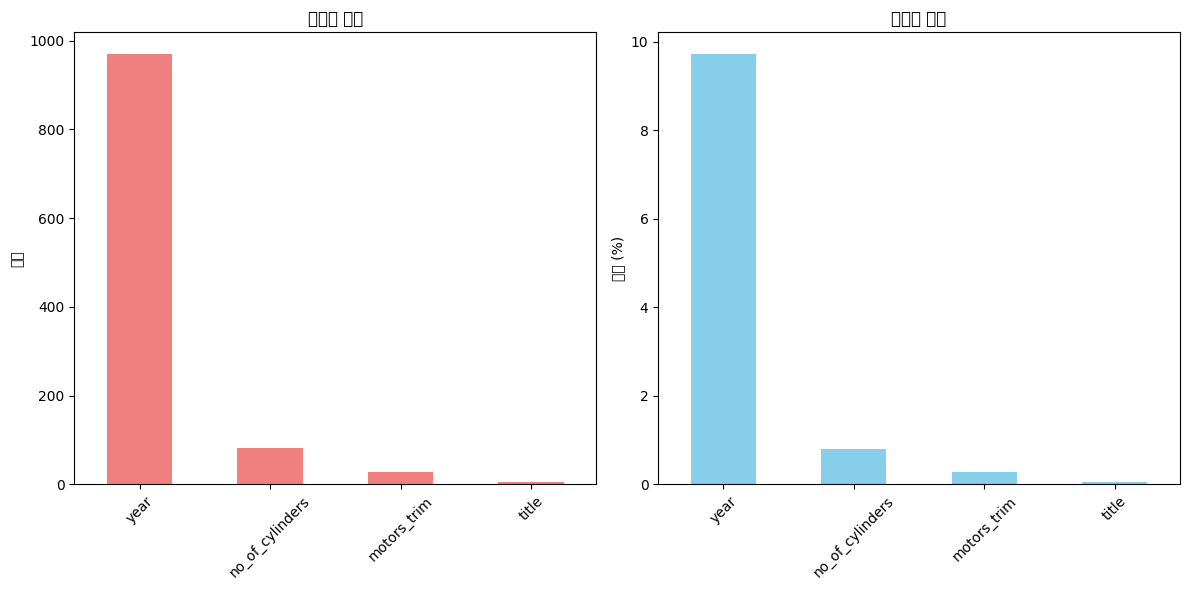

In [9]:
# 결측값 현황 분석
print("🔍 결측값 현황 분석")
print("="*70)

missing_info = pd.DataFrame({
    '결측값 개수': df.isnull().sum(),
    '결측값 비율(%)': (df.isnull().sum() / len(df) * 100).round(2)
})

# 결측값이 있는 컬럼만 표시
missing_columns = missing_info[missing_info['결측값 개수'] > 0]
if not missing_columns.empty:
    missing_columns = missing_columns.sort_values('결측값 개수', ascending=False)
    display(missing_columns)
    
    print(f"\n📊 결측값 요약:")
    print(f"   • 결측값이 있는 컬럼: {len(missing_columns)}개")
    print(f"   • 전체 결측값 개수: {df.isnull().sum().sum():,}개")
    print(f"   • 전체 데이터 대비 결측값 비율: {(df.isnull().sum().sum() / df.size * 100):.2f}%")
else:
    print("✅ 결측값이 없습니다!")

# 결측값 시각화
if not missing_columns.empty:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    missing_columns['결측값 개수'].plot(kind='bar', color='lightcoral')
    plt.title('결측값 개수')
    plt.ylabel('개수')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    missing_columns['결측값 비율(%)'].plot(kind='bar', color='skyblue')
    plt.title('결측값 비율')
    plt.ylabel('비율 (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

## 📊 4. 탐색적 데이터 분석 (EDA)

데이터의 분포와 패턴을 시각적으로 분석합니다.

💰 타겟 변수 (가격) 분포 분석
📊 가격 통계:
   • count: 9,970
   • mean: 248,050 AED
   • std: 453,655 AED
   • min: 6,000 AED
   • 25%: 51,000 AED
   • 50%: 104,000 AED
   • 75%: 234,000 AED
   • max: 14,999,000 AED


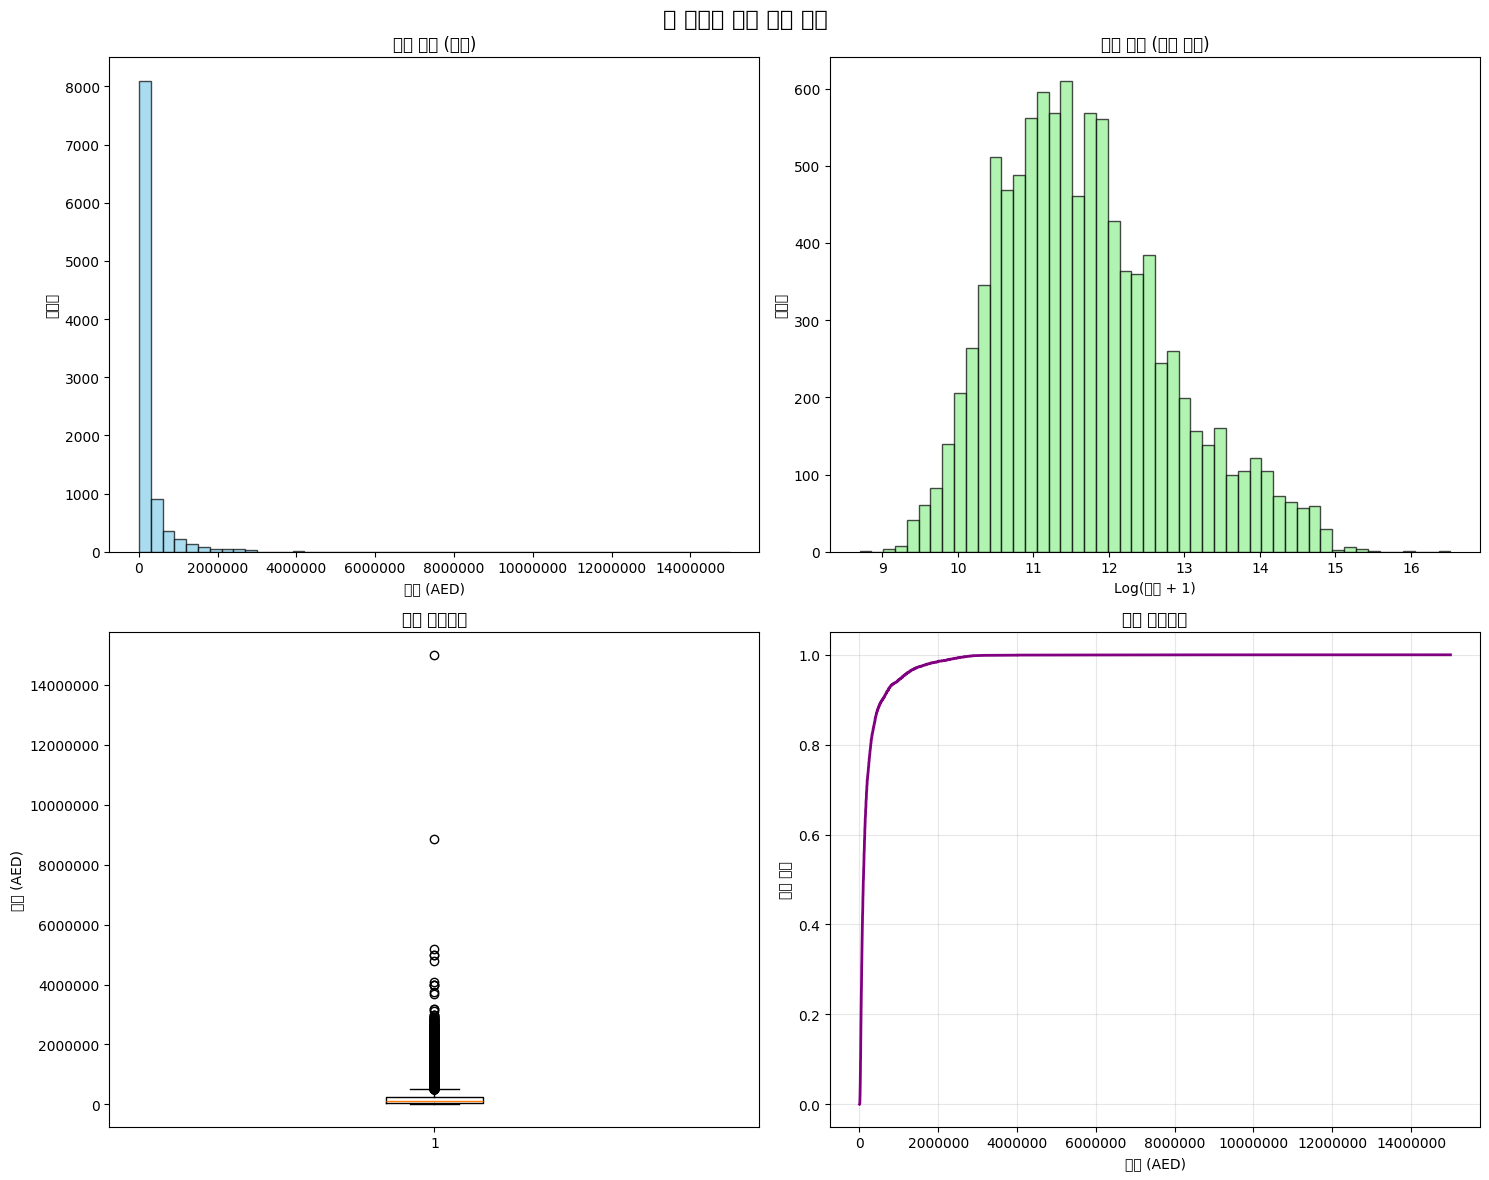


💰 가격 구간별 차량 분포:
   • 저가 (5만 이하): 2,486대 (24.9%)
   • 중저가 (5-10만): 2,471대 (24.8%)
   • 중간 (10-20만): 2,240대 (22.5%)
   • 중고가 (20-50만): 1,650대 (16.5%)
   • 고가 (50만 이상): 1,123대 (11.3%)


In [10]:
# 타겟 변수(가격) 분포 분석
print("💰 타겟 변수 (가격) 분포 분석")
print("="*70)

# 가격 기본 통계
price_stats = df['price_in_aed'].describe()
print("📊 가격 통계:")
for stat, value in price_stats.items():
    if stat in ['count']:
        print(f"   • {stat}: {value:,.0f}")
    else:
        print(f"   • {stat}: {value:,.0f} AED")

# 가격 분포 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🚗 중고차 가격 분포 분석', fontsize=16, fontweight='bold')

# 1. 원본 가격 히스토그램
axes[0,0].hist(df['price_in_aed'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('가격 분포 (원본)')
axes[0,0].set_xlabel('가격 (AED)')
axes[0,0].set_ylabel('빈도수')
axes[0,0].ticklabel_format(style='plain', axis='x')

# 2. 로그 변환 가격 히스토그램
axes[0,1].hist(np.log1p(df['price_in_aed']), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('가격 분포 (로그 변환)')
axes[0,1].set_xlabel('Log(가격 + 1)')
axes[0,1].set_ylabel('빈도수')

# 3. 가격 박스플롯
axes[1,0].boxplot(df['price_in_aed'])
axes[1,0].set_title('가격 박스플롯')
axes[1,0].set_ylabel('가격 (AED)')
axes[1,0].ticklabel_format(style='plain', axis='y')

# 4. 가격 누적분포
sorted_prices = np.sort(df['price_in_aed'])
p = np.arange(len(sorted_prices)) / (len(sorted_prices) - 1)
axes[1,1].plot(sorted_prices, p, linewidth=2, color='purple')
axes[1,1].set_title('가격 누적분포')
axes[1,1].set_xlabel('가격 (AED)')
axes[1,1].set_ylabel('누적 확률')
axes[1,1].ticklabel_format(style='plain', axis='x')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 가격 구간별 분포
price_ranges = {
    '저가 (5만 이하)': (0, 50000),
    '중저가 (5-10만)': (50000, 100000),
    '중간 (10-20만)': (100000, 200000),
    '중고가 (20-50만)': (200000, 500000),
    '고가 (50만 이상)': (500000, float('inf'))
}

print("\n💰 가격 구간별 차량 분포:")
for range_name, (min_price, max_price) in price_ranges.items():
    count = len(df[(df['price_in_aed'] > min_price) & (df['price_in_aed'] <= max_price)])
    percentage = count / len(df) * 100
    print(f"   • {range_name}: {count:,}대 ({percentage:.1f}%)")

🏷️ 범주형 변수 분석

📊 company 통계:
   • 고유값 개수: 73개
   • 최빈값: mercedes-benz (1506회, 15.1%)

📊 body_type 통계:
   • 고유값 개수: 13개
   • 최빈값: SUV (4566회, 45.8%)

📊 fuel_type 통계:
   • 고유값 개수: 4개
   • 최빈값: Gasoline (9695회, 97.2%)

📊 transmission_type 통계:
   • 고유값 개수: 2개
   • 최빈값: Automatic Transmission (9581회, 96.1%)

📊 emirate 통계:
   • 고유값 개수: 16개
   • 최빈값:  Dubai (7978회, 80.0%)


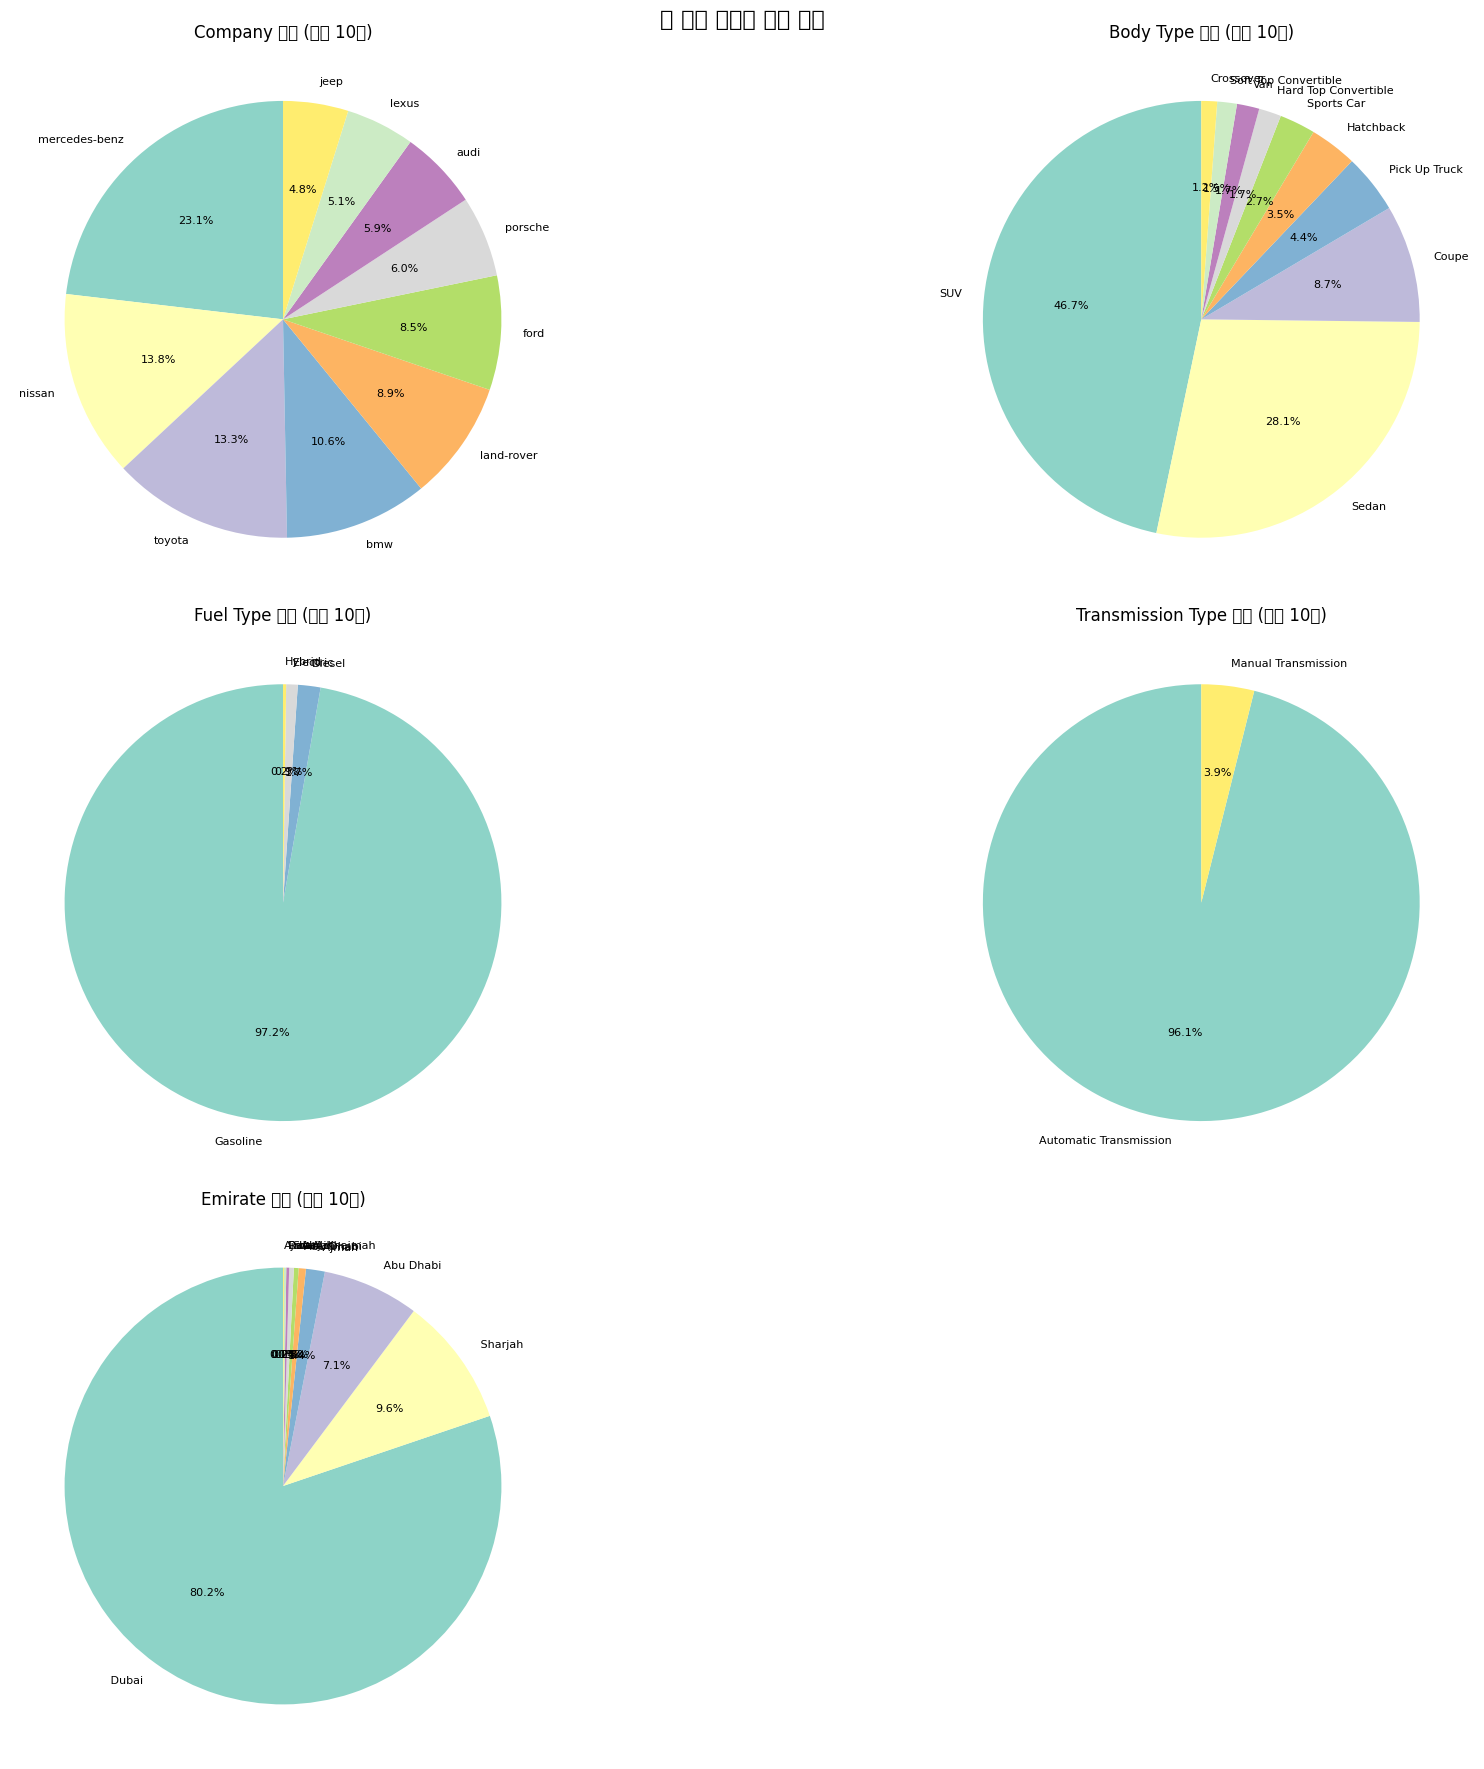

In [11]:
# 주요 범주형 변수 분석
print("🏷️ 범주형 변수 분석")
print("="*70)

categorical_cols = ['company', 'body_type', 'fuel_type', 'transmission_type', 'emirate']

fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle('🏷️ 주요 범주형 변수 분포', fontsize=16, fontweight='bold')

for i, col in enumerate(categorical_cols):
    if col in df.columns:
        row, col_idx = divmod(i, 2)
        
        # 상위 10개 카테고리만 표시
        top_categories = df[col].value_counts().head(10)
        
        # 파이 차트
        colors = plt.cm.Set3(np.linspace(0, 1, len(top_categories)))
        wedges, texts, autotexts = axes[row, col_idx].pie(
            top_categories.values, 
            labels=top_categories.index, 
            autopct='%1.1f%%',
            colors=colors,
            startangle=90
        )
        axes[row, col_idx].set_title(f'{col.replace("_", " ").title()} 분포 (상위 10개)')
        
        # 텍스트 크기 조정
        for autotext in autotexts:
            autotext.set_fontsize(8)
        for text in texts:
            text.set_fontsize(8)
        
        print(f"\n📊 {col} 통계:")
        print(f"   • 고유값 개수: {df[col].nunique()}개")
        print(f"   • 최빈값: {df[col].mode().iloc[0]} ({df[col].value_counts().iloc[0]}회, {df[col].value_counts().iloc[0]/len(df)*100:.1f}%)")

# 빈 subplot 제거
if len(categorical_cols) < 6:
    axes[2, 1].remove()

plt.tight_layout()
plt.show()

🔢 수치형 변수 상관관계 분석
📊 상관관계 매트릭스:


,price_in_aed,kilometers,year
price_in_aed,1.000,-0.028,0.205
kilometers,-0.028,1.000,-0.053
year,0.205,-0.053,1.000


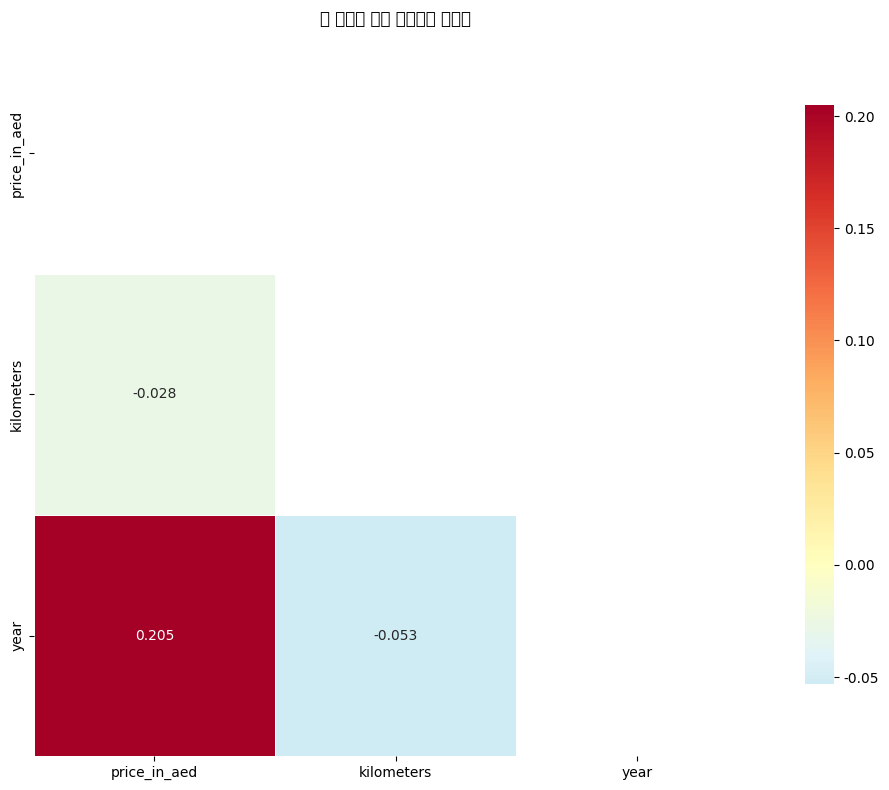


💡 상관관계 해석:
   • +1에 가까울수록: 강한 양의 상관관계
   • -1에 가까울수록: 강한 음의 상관관계
   • 0에 가까울수록: 상관관계 없음

📈 가격과의 상관관계:
   • year: 0.205 (약한 양의 상관관계)
   • kilometers: -0.028 (약한 음의 상관관계)


In [12]:
# 수치형 변수들 간의 상관관계 분석
print("🔢 수치형 변수 상관관계 분석")
print("="*70)

# 수치형 컬럼 선택
numeric_cols = ['price_in_aed', 'kilometers', 'year']
numeric_df = df[numeric_cols].copy()

# year 컬럼의 결측값을 중앙값으로 임시 처리
numeric_df['year'] = numeric_df['year'].fillna(numeric_df['year'].median())

# 상관관계 계산
correlation_matrix = numeric_df.corr()

print("📊 상관관계 매트릭스:")
display(correlation_matrix.round(3))

# 상관관계 히트맵
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # 상삼각형 마스크
sns.heatmap(
    correlation_matrix, 
    mask=mask,
    annot=True, 
    cmap='RdYlBu_r', 
    center=0,
    square=True, 
    linewidths=0.5, 
    cbar_kws={'shrink': .8},
    fmt='.3f'
)
plt.title('🔢 수치형 변수 상관관계 히트맵')
plt.tight_layout()
plt.show()

print("\n💡 상관관계 해석:")
print("   • +1에 가까울수록: 강한 양의 상관관계")
print("   • -1에 가까울수록: 강한 음의 상관관계")
print("   • 0에 가까울수록: 상관관계 없음")

# 주요 상관관계 분석
price_corr = correlation_matrix['price_in_aed'].drop('price_in_aed').sort_values(key=abs, ascending=False)
print(f"\n📈 가격과의 상관관계:")
for var, corr in price_corr.items():
    direction = "양의" if corr > 0 else "음의"
    strength = "강한" if abs(corr) > 0.7 else "중간" if abs(corr) > 0.3 else "약한"
    print(f"   • {var}: {corr:.3f} ({strength} {direction} 상관관계)")

## 🔧 5. 데이터 전처리

머신러닝 모델 학습을 위해 데이터를 정제하고 변환합니다.

In [13]:
print("🔧 데이터 전처리 시작")
print("="*70)

# 데이터 복사본 생성
df_clean = df.copy()
original_shape = df_clean.shape
print(f"📏 원본 데이터 크기: {original_shape}")

# 1단계: 극단값 제거
print("\n1️⃣ 극단값 제거 (가격 기준 1%~99% 분위수)")
price_q01 = df_clean['price_in_aed'].quantile(0.01)
price_q99 = df_clean['price_in_aed'].quantile(0.99)
print(f"   • 1% 분위수: {price_q01:,.0f} AED")
print(f"   • 99% 분위수: {price_q99:,.0f} AED")

df_clean = df_clean[
    (df_clean['price_in_aed'] >= price_q01) & 
    (df_clean['price_in_aed'] <= price_q99)
]
removed_count = original_shape[0] - df_clean.shape[0]
print(f"   • 제거된 행: {removed_count:,}개 ({removed_count/original_shape[0]*100:.2f}%)")
print(f"   • 현재 데이터 크기: {df_clean.shape}")

# 2단계: 결측값 처리
print("\n2️⃣ 결측값 처리")

# year 컬럼 처리
if 'year' in df_clean.columns:
    year_missing = df_clean['year'].isnull().sum()
    if year_missing > 0:
        year_median = df_clean['year'].median()
        df_clean['year'] = df_clean['year'].fillna(year_median)
        print(f"   • year 컬럼: {year_missing:,}개 결측값을 중앙값 {year_median}으로 대체")

# horsepower 컬럼 처리
if 'horsepower' in df_clean.columns:
    hp_missing = df_clean['horsepower'].isnull().sum()
    if hp_missing > 0:
        df_clean['horsepower'] = df_clean['horsepower'].fillna('Unknown')
        print(f"   • horsepower 컬럼: {hp_missing:,}개 결측값을 'Unknown'으로 대체")

# 3단계: 파생 변수 생성
print("\n3️⃣ 파생 변수 생성")
current_year = 2024
if 'year' in df_clean.columns:
    df_clean['car_age'] = current_year - df_clean['year']
    print(f"   • car_age 컬럼 생성: {current_year} - year")
    print(f"   • 차량 연식 범위: {df_clean['car_age'].min():.0f}~{df_clean['car_age'].max():.0f}년")

print(f"\n✅ 전처리 완료 후 데이터 크기: {df_clean.shape}")

🔧 데이터 전처리 시작
📏 원본 데이터 크기: (9970, 20)

1️⃣ 극단값 제거 (가격 기준 1%~99% 분위수)
   • 1% 분위수: 15,000 AED
   • 99% 분위수: 2,299,000 AED
   • 제거된 행: 191개 (1.92%)
   • 현재 데이터 크기: (9779, 20)

2️⃣ 결측값 처리
   • year 컬럼: 919개 결측값을 중앙값 2016.0으로 대체

3️⃣ 파생 변수 생성
   • car_age 컬럼 생성: 2024 - year
   • 차량 연식 범위: 3~71년

✅ 전처리 완료 후 데이터 크기: (9779, 21)


In [14]:
# 4단계: 범주형 변수 인코딩
print("4️⃣ 범주형 변수 라벨 인코딩")
print("="*50)

# 인코딩할 범주형 특성들
categorical_features = [
    'company', 'model', 'body_type', 'fuel_type', 
    'transmission_type', 'emirate', 'color', 'horsepower'
]

# 라벨 인코더 딕셔너리 (나중에 역변환할 때 사용)
label_encoders = {}
encoding_info = {}

for feature in categorical_features:
    if feature in df_clean.columns:
        # 결측값을 'Unknown'으로 처리
        df_clean[feature] = df_clean[feature].fillna('Unknown')
        
        # 라벨 인코딩
        le = LabelEncoder()
        df_clean[f'{feature}_encoded'] = le.fit_transform(df_clean[feature])
        
        # 인코더 저장
        label_encoders[feature] = le
        
        # 인코딩 정보 저장
        unique_count = len(le.classes_)
        encoding_info[feature] = {
            'unique_count': unique_count,
            'most_frequent': df_clean[feature].mode().iloc[0],
            'encoded_range': f'0~{unique_count-1}'
        }
        
        print(f"   • {feature}: {unique_count}개 카테고리 → {encoding_info[feature]['encoded_range']}")
        print(f"     최빈값: {encoding_info[feature]['most_frequent']}")

print(f"\n✅ 총 {len(encoding_info)}개 범주형 변수 인코딩 완료")

4️⃣ 범주형 변수 라벨 인코딩
   • company: 73개 카테고리 → 0~72
     최빈값: mercedes-benz
   • model: 542개 카테고리 → 0~541
     최빈값: patrol
   • body_type: 13개 카테고리 → 0~12
     최빈값: SUV
   • fuel_type: 4개 카테고리 → 0~3
     최빈값: Gasoline
   • transmission_type: 2개 카테고리 → 0~1
     최빈값: Automatic Transmission
   • emirate: 16개 카테고리 → 0~15
     최빈값:  Dubai
   • color: 17개 카테고리 → 0~16
     최빈값: White
   • horsepower: 11개 카테고리 → 0~10
     최빈값: 200 - 300 HP

✅ 총 8개 범주형 변수 인코딩 완료


In [15]:
# 5단계: 특성 선택 및 데이터 분할
print("5️⃣ 특성 선택 및 데이터 분할")
print("="*50)

# 모델링에 사용할 특성들 선택
feature_columns = [
    'kilometers',               # 주행거리
    'car_age',                 # 차량 연식
    'company_encoded',         # 제조사 (인코딩)
    'body_type_encoded',       # 차체 타입 (인코딩)
    'fuel_type_encoded',       # 연료 타입 (인코딩)
    'transmission_type_encoded', # 변속기 타입 (인코딩)
    'emirate_encoded',         # 지역 (인코딩)
    'horsepower_encoded'       # 마력 (인코딩)
]

# 실제로 존재하는 컬럼만 선택
available_features = [col for col in feature_columns if col in df_clean.columns]
missing_features = [col for col in feature_columns if col not in df_clean.columns]

print(f"📊 사용 가능한 특성: {len(available_features)}개")
for i, feature in enumerate(available_features, 1):
    print(f"   {i:2d}. {feature}")

if missing_features:
    print(f"\n⚠️ 누락된 특성: {len(missing_features)}개")
    for feature in missing_features:
        print(f"   • {feature}")

# 특성(X)과 타겟(y) 분리
X = df_clean[available_features]
y = df_clean['price_in_aed']

print(f"\n📏 최종 데이터 크기:")
print(f"   • 특성 행렬 (X): {X.shape}")
print(f"   • 타겟 벡터 (y): {y.shape}")
print(f"   • 결측값 확인: {X.isnull().sum().sum()}개")

# 훈련/테스트 데이터 분할
print("\n📊 훈련/테스트 데이터 분할 (8:2 비율)")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,  # 재현 가능한 결과
    stratify=None     # 회귀 문제이므로 층화추출 안함
)

print(f"   • 훈련 데이터: {X_train.shape} (전체의 {len(X_train)/len(X)*100:.1f}%)")
print(f"   • 테스트 데이터: {X_test.shape} (전체의 {len(X_test)/len(X)*100:.1f}%)")

print(f"\n📈 타겟 변수 분포:")
print(f"   • 훈련 세트 평균 가격: {y_train.mean():,.0f} AED")
print(f"   • 테스트 세트 평균 가격: {y_test.mean():,.0f} AED")
print(f"   • 가격 분포 차이: {abs(y_train.mean() - y_test.mean()):,.0f} AED")

5️⃣ 특성 선택 및 데이터 분할
📊 사용 가능한 특성: 8개
    1. kilometers
    2. car_age
    3. company_encoded
    4. body_type_encoded
    5. fuel_type_encoded
    6. transmission_type_encoded
    7. emirate_encoded
    8. horsepower_encoded

📏 최종 데이터 크기:
   • 특성 행렬 (X): (9779, 8)
   • 타겟 벡터 (y): (9779,)
   • 결측값 확인: 0개

📊 훈련/테스트 데이터 분할 (8:2 비율)
   • 훈련 데이터: (7823, 8) (전체의 80.0%)
   • 테스트 데이터: (1956, 8) (전체의 20.0%)

📈 타겟 변수 분포:
   • 훈련 세트 평균 가격: 225,656 AED
   • 테스트 세트 평균 가격: 210,238 AED
   • 가격 분포 차이: 15,418 AED


In [16]:
# 6단계: 데이터 표준화
print("6️⃣ 데이터 표준화 (StandardScaler)")
print("="*50)

# 표준화 전 통계
print("표준화 전:")
print(f"   • 평균: {X_train.mean().mean():.2f}")
print(f"   • 표준편차: {X_train.std().mean():.2f}")
print(f"   • 최솟값: {X_train.min().min():.2f}")
print(f"   • 최댓값: {X_train.max().max():.2f}")

# StandardScaler 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터로 스케일러 학습 및 변환
X_test_scaled = scaler.transform(X_test)        # 테스트 데이터 변환 (동일한 스케일러 사용)

# 표준화 후 통계
print("\n표준화 후:")
print(f"   • 평균: {X_train_scaled.mean():.6f}")
print(f"   • 표준편차: {X_train_scaled.std():.6f}")
print(f"   • 최솟값: {X_train_scaled.min():.2f}")
print(f"   • 최댓값: {X_train_scaled.max():.2f}")

# 각 특성별 스케일링 정보
scaling_info = pd.DataFrame({
    'Feature': available_features,
    'Original_Mean': X_train.mean().values,
    'Original_Std': X_train.std().values,
    'Scaled_Mean': X_train_scaled.mean(axis=0),
    'Scaled_Std': X_train_scaled.std(axis=0)
})

print("\n📊 특성별 스케일링 정보:")
display(scaling_info.round(4))

print("\n✅ 데이터 전처리 완료!")
print(f"📏 최종 학습 데이터: X_train_scaled {X_train_scaled.shape}, y_train {y_train.shape}")
print(f"📏 최종 테스트 데이터: X_test_scaled {X_test_scaled.shape}, y_test {y_test.shape}")

6️⃣ 데이터 표준화 (StandardScaler)
표준화 전:
   • 평균: 10914.75
   • 표준편차: 10849.75
   • 최솟값: 0.00
   • 최댓값: 2500000.00

표준화 후:
   • 평균: -0.000000
   • 표준편차: 1.000000
   • 최솟값: -6.84
   • 최댓값: 27.81

📊 특성별 스케일링 정보:


,Feature,Original_Mean,Original_Std,Scaled_Mean,Scaled_Std
0,kilometers,87258.5406,86765.9975,-0.0,1.0
1,car_age,8.2404,4.2968,0.0,1.0
2,company_encoded,37.3777,20.4980,-0.0,1.0
3,body_type_encoded,5.7184,2.2687,-0.0,1.0
4,fuel_type_encoded,1.9570,0.2859,-0.0,1.0
5,transmission_type_encoded,0.0389,0.1933,-0.0,1.0
6,emirate_encoded,3.1456,1.5596,0.0,1.0
7,horsepower_encoded,2.9625,2.8608,-0.0,1.0



✅ 데이터 전처리 완료!
📏 최종 학습 데이터: X_train_scaled (7823, 8), y_train (7823,)
📏 최종 테스트 데이터: X_test_scaled (1956, 8), y_test (1956,)


## 🤖 6. 머신러닝 모델 구현

다양한 회귀 모델을 학습하고 성능을 비교합니다.

In [17]:
print("🤖 머신러닝 모델 학습 및 비교")
print("="*70)

# 사용할 모델들 정의
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'description': '기본 선형회귀 모델 (규제 없음)'
    },
    'Ridge Regression': {
        'model': Ridge(alpha=1.0, random_state=42),
        'description': 'L2 규제를 적용한 Ridge 회귀 (과적합 방지)'
    },
    'Lasso Regression': {
        'model': Lasso(alpha=1.0, random_state=42, max_iter=2000),
        'description': 'L1 규제를 적용한 Lasso 회귀 (특성 선택 효과)'
    },
    'ElasticNet': {
        'model': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42, max_iter=2000),
        'description': 'L1과 L2 규제를 결합한 ElasticNet (균형잡힌 규제)'
    }
}

print("🎯 사용할 모델들:")
for i, (name, info) in enumerate(models.items(), 1):
    print(f"   {i}. {name}: {info['description']}")

# 모델 성능을 저장할 딕셔너리
model_results = {}
trained_models = {}  # 학습된 모델들을 저장

print("\n" + "="*70)
print("🚀 모델 학습 시작")
print("="*70)

for model_name, model_info in models.items():
    print(f"\n🔄 {model_name} 학습 중...")
    
    model = model_info['model']
    
    # 모델 학습
    start_time = pd.Timestamp.now()
    model.fit(X_train_scaled, y_train)
    training_time = (pd.Timestamp.now() - start_time).total_seconds()
    
    # 예측 수행
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # 평가 지표 계산
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # 교차 검증 수행 (5-fold)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # 결과 저장
    model_results[model_name] = {
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'CV R² Mean': cv_mean,
        'CV R² Std': cv_std,
        'Training Time': training_time
    }
    
    trained_models[model_name] = model
    
    # 결과 출력
    print(f"   ✅ 학습 완료 ({training_time:.2f}초)")
    print(f"   📊 성능 지표:")
    print(f"      • 훈련 MAE: {train_mae:,.0f} AED")
    print(f"      • 테스트 MAE: {test_mae:,.0f} AED")
    print(f"      • 훈련 R²: {train_r2:.4f}")
    print(f"      • 테스트 R²: {test_r2:.4f}")
    print(f"      • 교차검증 R²: {cv_mean:.4f} (±{cv_std:.4f})")
    
    # 과적합 체크
    overfitting = train_r2 - test_r2
    if overfitting > 0.1:
        print(f"      ⚠️ 과적합 의심 (R² 차이: {overfitting:.3f})")
    elif overfitting > 0.05:
        print(f"      ⚡ 경미한 과적합 (R² 차이: {overfitting:.3f})")
    else:
        print(f"      ✅ 양호한 일반화 (R² 차이: {overfitting:.3f})")

print("\n🎉 모든 모델 학습 완료!")

🤖 머신러닝 모델 학습 및 비교
🎯 사용할 모델들:
   1. Linear Regression: 기본 선형회귀 모델 (규제 없음)
   2. Ridge Regression: L2 규제를 적용한 Ridge 회귀 (과적합 방지)
   3. Lasso Regression: L1 규제를 적용한 Lasso 회귀 (특성 선택 효과)
   4. ElasticNet: L1과 L2 규제를 결합한 ElasticNet (균형잡힌 규제)

🚀 모델 학습 시작

🔄 Linear Regression 학습 중...
   ✅ 학습 완료 (0.00초)
   📊 성능 지표:
      • 훈련 MAE: 176,286 AED
      • 테스트 MAE: 238,856 AED
      • 훈련 R²: 0.1945
      • 테스트 R²: -114.7853
      • 교차검증 R²: 0.1892 (±0.0244)
      ⚠️ 과적합 의심 (R² 차이: 114.980)

🔄 Ridge Regression 학습 중...
   ✅ 학습 완료 (0.00초)
   📊 성능 지표:
      • 훈련 MAE: 176,285 AED
      • 테스트 MAE: 238,845 AED
      • 훈련 R²: 0.1945
      • 테스트 R²: -114.7559
      • 교차검증 R²: 0.1892 (±0.0244)
      ⚠️ 과적합 의심 (R² 차이: 114.950)

🔄 Lasso Regression 학습 중...
   ✅ 학습 완료 (0.00초)
   📊 성능 지표:
      • 훈련 MAE: 176,286 AED
      • 테스트 MAE: 238,855 AED
      • 훈련 R²: 0.1945
      • 테스트 R²: -114.7848
      • 교차검증 R²: 0.1892 (±0.0244)
      ⚠️ 과적합 의심 (R² 차이: 114.979)

🔄 ElasticNet 학습 중...
   ✅ 학습 완료 (0.00초)
   📊 성능 지표:
      

In [18]:
# 모델 성능 비교 결과 정리
print("📊 모델 성능 비교 결과")
print("="*70)

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(model_results).T

print("🏆 전체 성능 비교표:")
display(results_df.round(4))

# 최적 모델 선정 (테스트 R² 기준)
best_model_name = results_df['Test R²'].idxmax()
best_r2 = results_df.loc[best_model_name, 'Test R²']
best_mae = results_df.loc[best_model_name, 'Test MAE']
best_cv_mean = results_df.loc[best_model_name, 'CV R² Mean']
best_cv_std = results_df.loc[best_model_name, 'CV R² Std']

print(f"\n🥇 최고 성능 모델: {best_model_name}")
print(f"   📈 테스트 R² 점수: {best_r2:.4f} ({best_r2*100:.1f}% 설명력)")
print(f"   📉 테스트 MAE: {best_mae:,.0f} AED")
print(f"   🔄 교차검증 R²: {best_cv_mean:.4f} (±{best_cv_std:.4f})")
print(f"   💡 실제 가격 대비 평균 오차율: {best_mae/y_test.mean()*100:.1f}%")

# 성능 순위 생성
print("\n🏅 모델 순위 (테스트 R² 기준):")
rank_df = results_df[['Test R²', 'Test MAE', 'CV R² Mean']].copy()
rank_df = rank_df.sort_values('Test R²', ascending=False)

for i, (model_name, row) in enumerate(rank_df.iterrows(), 1):
    medal = ["🥇", "🥈", "🥉"][i-1] if i <= 3 else f"{i}."
    print(f"   {medal} {model_name}: R² = {row['Test R²']:.4f}, MAE = {row['Test MAE']:,.0f} AED")

# 각 지표별 최고 성능 모델
print("\n🎯 지표별 최고 성능:")
metrics = {
    'Test R² (높을수록 좋음)': results_df['Test R²'].idxmax(),
    'Test MAE (낮을수록 좋음)': results_df['Test MAE'].idxmin(),
    'CV R² Mean (높을수록 좋음)': results_df['CV R² Mean'].idxmax(),
    'Training Time (빠를수록 좋음)': results_df['Training Time'].idxmin()
}

for metric, best_model in metrics.items():
    value = results_df.loc[best_model, metric.split('(')[0].strip()]
    if 'Time' in metric:
        print(f"   • {metric}: {best_model} ({value:.2f}초)")
    elif 'MAE' in metric:
        print(f"   • {metric}: {best_model} ({value:,.0f} AED)")
    else:
        print(f"   • {metric}: {best_model} ({value:.4f})")

📊 모델 성능 비교 결과
🏆 전체 성능 비교표:


,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R²,Test R²,CV R² Mean,CV R² Std,Training Time
Linear Regression,176286.2077,238855.7692,305135.2731,3.255433e+06,0.1945,-114.7853,0.1892,0.0244,0.002
Ridge Regression,176285.0044,238845.3378,305135.2735,3.255019e+06,0.1945,-114.7559,0.1892,0.0244,0.001
Lasso Regression,176285.9446,238855.3080,305135.2731,3.255425e+06,0.1945,-114.7848,0.1892,0.0244,0.001
ElasticNet,177267.8020,216116.5240,308237.9757,2.227595e+06,0.1780,-53.2136,0.1762,0.0098,0.001



🥇 최고 성능 모델: ElasticNet
   📈 테스트 R² 점수: -53.2136 (-5321.4% 설명력)
   📉 테스트 MAE: 216,117 AED
   🔄 교차검증 R²: 0.1762 (±0.0098)
   💡 실제 가격 대비 평균 오차율: 102.8%

🏅 모델 순위 (테스트 R² 기준):
   🥇 ElasticNet: R² = -53.2136, MAE = 216,117 AED
   🥈 Ridge Regression: R² = -114.7559, MAE = 238,845 AED
   🥉 Lasso Regression: R² = -114.7848, MAE = 238,855 AED
   4. Linear Regression: R² = -114.7853, MAE = 238,856 AED

🎯 지표별 최고 성능:
   • Test R² (높을수록 좋음): ElasticNet (-53.2136)
   • Test MAE (낮을수록 좋음): ElasticNet (216,117 AED)
   • CV R² Mean (높을수록 좋음): Ridge Regression (0.1892)
   • Training Time (빠를수록 좋음): Ridge Regression (0.00초)


## 📈 7. 모델 성능 시각화 및 분석

학습된 모델들의 성능을 다양한 그래프로 시각화하고 분석합니다.

In [19]:
# 모델 성능 종합 시각화
print("📈 모델 성능 시각화")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('🤖 머신러닝 모델 성능 종합 분석', fontsize=16, fontweight='bold')

# 1. 테스트 MAE 비교
mae_values = results_df['Test MAE'].sort_values()
colors_mae = ['gold' if idx == best_model_name else 'lightcoral' for idx in mae_values.index]
bars1 = axes[0,0].bar(range(len(mae_values)), mae_values, color=colors_mae)
axes[0,0].set_title('테스트 MAE 비교\n(낮을수록 좋음)')
axes[0,0].set_ylabel('MAE (AED)')
axes[0,0].set_xticks(range(len(mae_values)))
axes[0,0].set_xticklabels(mae_values.index, rotation=45, ha='right')
axes[0,0].ticklabel_format(style='plain', axis='y')

# 막대 위에 값 표시
for i, (bar, value) in enumerate(zip(bars1, mae_values)):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(mae_values)*0.01,
                  f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

# 2. 테스트 R² 비교
r2_values = results_df['Test R²'].sort_values(ascending=False)
colors_r2 = ['gold' if idx == best_model_name else 'lightgreen' for idx in r2_values.index]
bars2 = axes[0,1].bar(range(len(r2_values)), r2_values, color=colors_r2)
axes[0,1].set_title('테스트 R² 비교\n(높을수록 좋음)')
axes[0,1].set_ylabel('R² Score')
axes[0,1].set_xticks(range(len(r2_values)))
axes[0,1].set_xticklabels(r2_values.index, rotation=45, ha='right')
axes[0,1].set_ylim(0, 1)

# 막대 위에 값 표시
for i, (bar, value) in enumerate(zip(bars2, r2_values)):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                  f'{value:.3f}', ha='center', va='bottom', fontsize=9)

# 3. 교차검증 R² 비교 (에러바 포함)
cv_mean = results_df['CV R² Mean']
cv_std = results_df['CV R² Std']
x_pos = range(len(cv_mean))
colors_cv = ['gold' if idx == best_model_name else 'skyblue' for idx in cv_mean.index]
bars3 = axes[0,2].bar(x_pos, cv_mean, yerr=cv_std, capsize=5, color=colors_cv, alpha=0.7)
axes[0,2].set_title('교차검증 R²\n(에러바: ±1 표준편차)')
axes[0,2].set_ylabel('CV R² Score')
axes[0,2].set_xticks(x_pos)
axes[0,2].set_xticklabels(cv_mean.index, rotation=45, ha='right')
axes[0,2].set_ylim(0, 1)

# 4. 훈련 vs 테스트 MAE (과적합 확인)
x_pos = np.arange(len(results_df))
width = 0.35
axes[1,0].bar(x_pos - width/2, results_df['Train MAE'], width, 
              label='Train MAE', alpha=0.8, color='lightblue')
axes[1,0].bar(x_pos + width/2, results_df['Test MAE'], width, 
              label='Test MAE', alpha=0.8, color='orange')
axes[1,0].set_title('훈련 vs 테스트 MAE\n(과적합 확인)')
axes[1,0].set_ylabel('MAE (AED)')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[1,0].legend()
axes[1,0].ticklabel_format(style='plain', axis='y')

# 5. 훈련 vs 테스트 R² (과적합 확인)
axes[1,1].bar(x_pos - width/2, results_df['Train R²'], width, 
              label='Train R²', alpha=0.8, color='lightgreen')
axes[1,1].bar(x_pos + width/2, results_df['Test R²'], width, 
              label='Test R²', alpha=0.8, color='coral')
axes[1,1].set_title('훈련 vs 테스트 R²\n(과적합 확인)')
axes[1,1].set_ylabel('R² Score')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[1,1].legend()
axes[1,1].set_ylim(0, 1)

# 6. 학습 시간 비교
time_values = results_df['Training Time'].sort_values()
colors_time = ['lightsteelblue'] * len(time_values)
bars6 = axes[1,2].bar(range(len(time_values)), time_values, color=colors_time)
axes[1,2].set_title('모델 학습 시간')
axes[1,2].set_ylabel('시간 (초)')
axes[1,2].set_xticks(range(len(time_values)))
axes[1,2].set_xticklabels(time_values.index, rotation=45, ha='right')

# 시간 값 표시
for i, (bar, value) in enumerate(zip(bars6, time_values)):
    axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(time_values)*0.01,
                  f'{value:.2f}s', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 과적합 분석
print("\n🔍 과적합 분석:")
print("="*50)
for model_name in results_df.index:
    train_r2 = results_df.loc[model_name, 'Train R²']
    test_r2 = results_df.loc[model_name, 'Test R²']
    gap = train_r2 - test_r2
    
    if gap > 0.1:
        status = "⚠️ 심각한 과적합"
    elif gap > 0.05:
        status = "⚡ 경미한 과적합"
    else:
        status = "✅ 양호한 일반화"
    
    print(f"   • {model_name}: Train-Test R² 차이 = {gap:+.3f} ({status})")

📈 모델 성능 시각화



🔍 과적합 분석:
   • Linear Regression: Train-Test R² 차이 = +114.980 (⚠️ 심각한 과적합)
   • Ridge Regression: Train-Test R² 차이 = +114.950 (⚠️ 심각한 과적합)
   • Lasso Regression: Train-Test R² 차이 = +114.979 (⚠️ 심각한 과적합)
   • ElasticNet: Train-Test R² 차이 = +53.392 (⚠️ 심각한 과적합)


🥇 최적 모델 'ElasticNet' 상세 분석


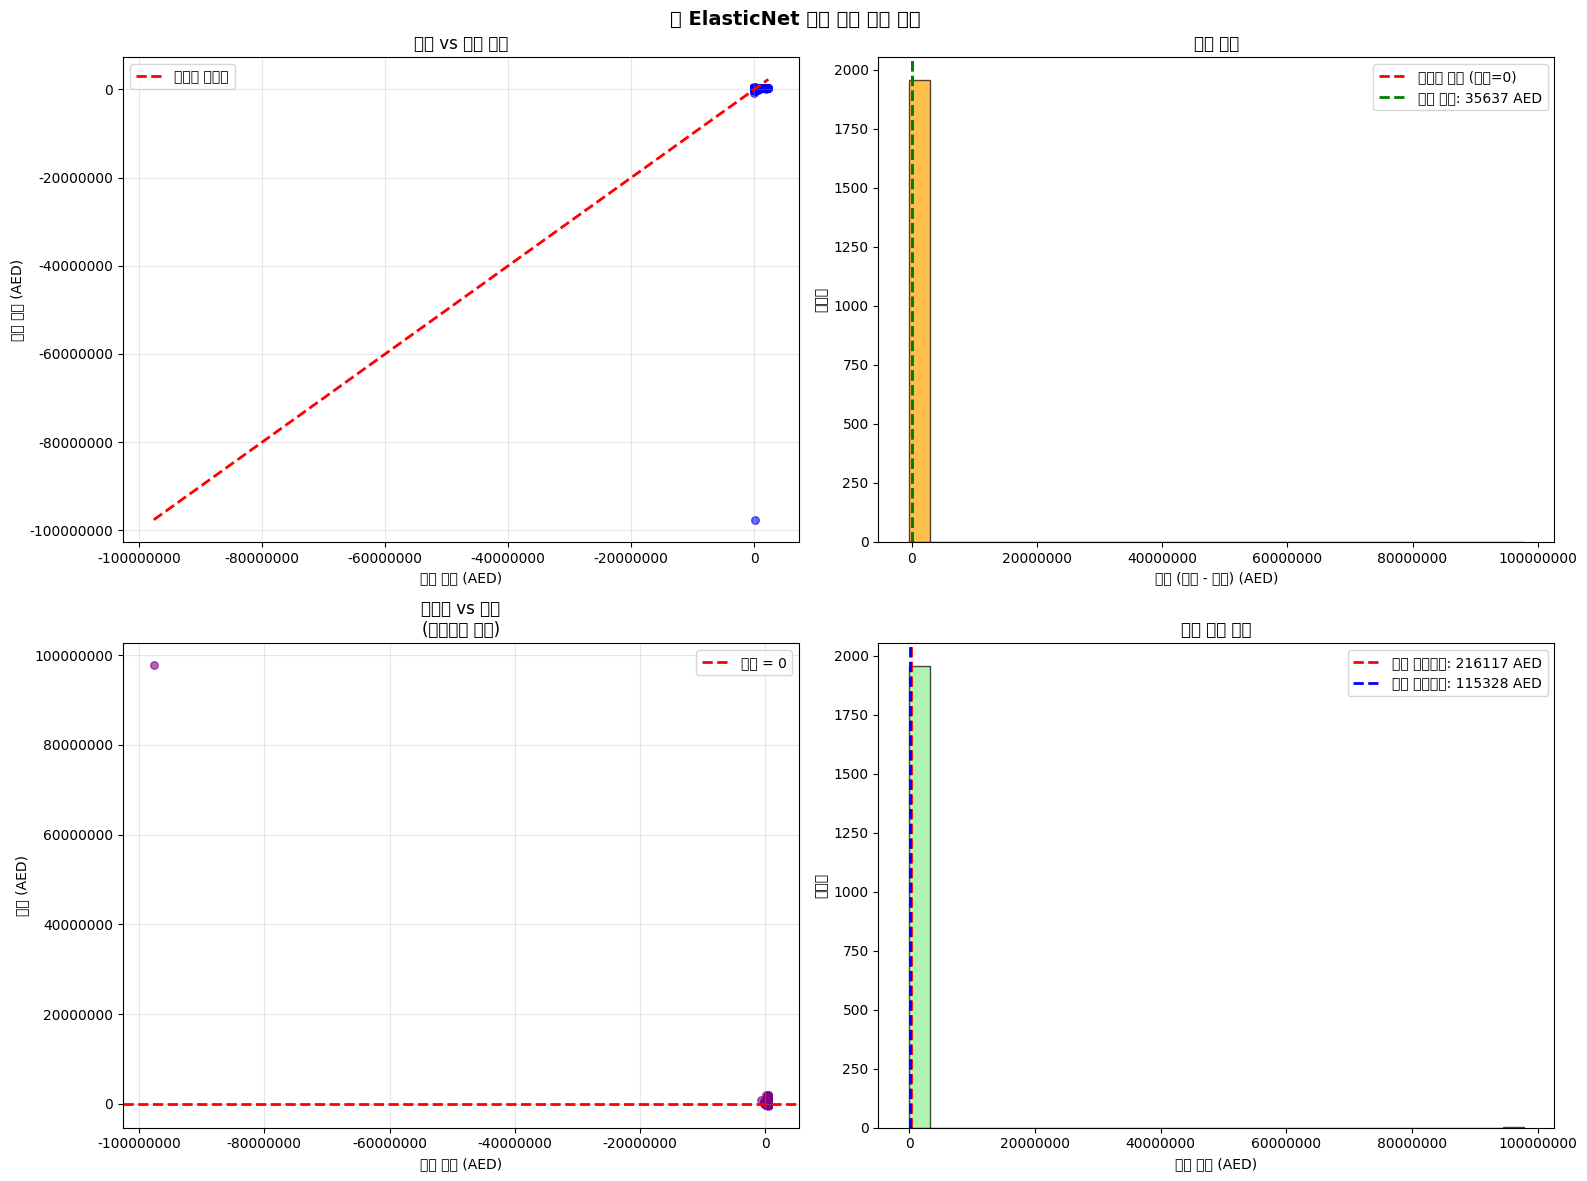


🎯 예측 정확도 상세 분석:
오차 범위별 예측 정확도:
   • ±5,000 AED 내 정확도: 2.0%
   • ±10,000 AED 내 정확도: 3.5%
   • ±20,000 AED 내 정확도: 7.7%
   • ±30,000 AED 내 정확도: 11.4%
   • ±50,000 AED 내 정확도: 19.6%

📊 오차 통계 요약:
   • 평균 절대 오차 (MAE): 216,117 AED
   • 평균 제곱근 오차 (RMSE): 2,227,595 AED
   • 평균 편향 (Bias): 35,637 AED
   • 오차 표준편차: 2,227,880 AED
   • 실제 가격 평균: 210,238 AED
   • 평균 상대 오차: 16.95%
   • 중앙 절대 오차: 115,328 AED

🔍 극단 사례 분석:
   • 최대 오차: 97,767,512 AED
     - 실제: 112,000 AED
     - 예측: -97,655,512 AED
   • 최소 오차: 14 AED
     - 실제: 88,000 AED
     - 예측: 87,986 AED


In [20]:
# 최적 모델 상세 분석
print(f"🥇 최적 모델 '{best_model_name}' 상세 분석")
print("="*70)

# 최적 모델로 예측 수행
best_model = trained_models[best_model_name]
y_test_pred_best = best_model.predict(X_test_scaled)
y_train_pred_best = best_model.predict(X_train_scaled)

# 예측 결과 상세 분석
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'🔍 {best_model_name} 예측 결과 상세 분석', fontsize=14, fontweight='bold')

# 1. 실제 vs 예측값 산점도
axes[0,0].scatter(y_test, y_test_pred_best, alpha=0.6, color='blue', s=30)
# 완벽한 예측선 (y=x)
min_val = min(y_test.min(), y_test_pred_best.min())
max_val = max(y_test.max(), y_test_pred_best.max())
axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='완벽한 예측선')
axes[0,0].set_xlabel('실제 가격 (AED)')
axes[0,0].set_ylabel('예측 가격 (AED)')
axes[0,0].set_title('실제 vs 예측 가격')
axes[0,0].legend()
axes[0,0].ticklabel_format(style='plain')
axes[0,0].grid(True, alpha=0.3)

# 2. 잔차(오차) 분포
residuals = y_test - y_test_pred_best
axes[0,1].hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[0,1].axvline(0, color='red', linestyle='--', linewidth=2, label='완벽한 예측 (오차=0)')
axes[0,1].axvline(residuals.mean(), color='green', linestyle='--', linewidth=2, 
                 label=f'평균 오차: {residuals.mean():.0f} AED')
axes[0,1].set_xlabel('잔차 (실제 - 예측) (AED)')
axes[0,1].set_ylabel('빈도수')
axes[0,1].set_title('잔차 분포')
axes[0,1].legend()
axes[0,1].ticklabel_format(style='plain', axis='x')

# 3. 잔차 vs 예측값 (등분산성 확인)
axes[1,0].scatter(y_test_pred_best, residuals, alpha=0.6, color='purple', s=30)
axes[1,0].axhline(y=0, color='red', linestyle='--', linewidth=2, label='오차 = 0')
axes[1,0].set_xlabel('예측 가격 (AED)')
axes[1,0].set_ylabel('잔차 (AED)')
axes[1,0].set_title('예측값 vs 잔차\n(등분산성 확인)')
axes[1,0].legend()
axes[1,0].ticklabel_format(style='plain')
axes[1,0].grid(True, alpha=0.3)

# 4. 예측 오차의 절댓값 분포
abs_errors = np.abs(residuals)
axes[1,1].hist(abs_errors, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,1].axvline(abs_errors.mean(), color='red', linestyle='--', linewidth=2, 
                 label=f'평균 절대오차: {abs_errors.mean():.0f} AED')
axes[1,1].axvline(abs_errors.median(), color='blue', linestyle='--', linewidth=2, 
                 label=f'중앙 절대오차: {abs_errors.median():.0f} AED')
axes[1,1].set_xlabel('절대 오차 (AED)')
axes[1,1].set_ylabel('빈도수')
axes[1,1].set_title('절대 오차 분포')
axes[1,1].legend()
axes[1,1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

# 예측 정확도 상세 분석
print("\n🎯 예측 정확도 상세 분석:")
print("="*50)

accuracy_ranges = [5000, 10000, 20000, 30000, 50000]
print("오차 범위별 예측 정확도:")
for range_val in accuracy_ranges:
    accuracy = np.mean(np.abs(residuals) <= range_val) * 100
    print(f"   • ±{range_val:,} AED 내 정확도: {accuracy:.1f}%")

print(f"\n📊 오차 통계 요약:")
print(f"   • 평균 절대 오차 (MAE): {mean_absolute_error(y_test, y_test_pred_best):,.0f} AED")
print(f"   • 평균 제곱근 오차 (RMSE): {np.sqrt(mean_squared_error(y_test, y_test_pred_best)):,.0f} AED")
print(f"   • 평균 편향 (Bias): {residuals.mean():,.0f} AED")
print(f"   • 오차 표준편차: {residuals.std():,.0f} AED")
print(f"   • 실제 가격 평균: {y_test.mean():,.0f} AED")
print(f"   • 평균 상대 오차: {abs(residuals.mean())/y_test.mean()*100:.2f}%")
print(f"   • 중앙 절대 오차: {np.median(np.abs(residuals)):,.0f} AED")

# 극단 사례 분석
max_error_idx = np.abs(residuals).idxmax()
min_error_idx = np.abs(residuals).idxmin()

print(f"\n🔍 극단 사례 분석:")
print(f"   • 최대 오차: {abs(residuals[max_error_idx]):,.0f} AED")
print(f"     - 실제: {y_test[max_error_idx]:,.0f} AED")
print(f"     - 예측: {y_test_pred_best[list(y_test.index).index(max_error_idx)]:,.0f} AED")
print(f"   • 최소 오차: {abs(residuals[min_error_idx]):,.0f} AED")
print(f"     - 실제: {y_test[min_error_idx]:,.0f} AED")
print(f"     - 예측: {y_test_pred_best[list(y_test.index).index(min_error_idx)]:,.0f} AED")

## 🔍 8. 특성 중요도 분석

최적 모델을 기반으로 어떤 특성이 중고차 가격에 가장 큰 영향을 미치는지 분석합니다.

🔍 특성 중요도 분석
📊 ElasticNet 모델의 특성 중요도:


,Feature,Coefficient,Abs_Coefficient
0,kilometers,-73851.7242,73851.7242
7,horsepower_encoded,40383.2090,40383.2090
1,car_age,-37543.2413,37543.2413
5,transmission_type_encoded,-13662.1990,13662.1990
6,emirate_encoded,-10894.5104,10894.5104
3,body_type_encoded,-9997.9832,9997.9832
2,company_encoded,9919.3799,9919.3799
4,fuel_type_encoded,7374.3426,7374.3426


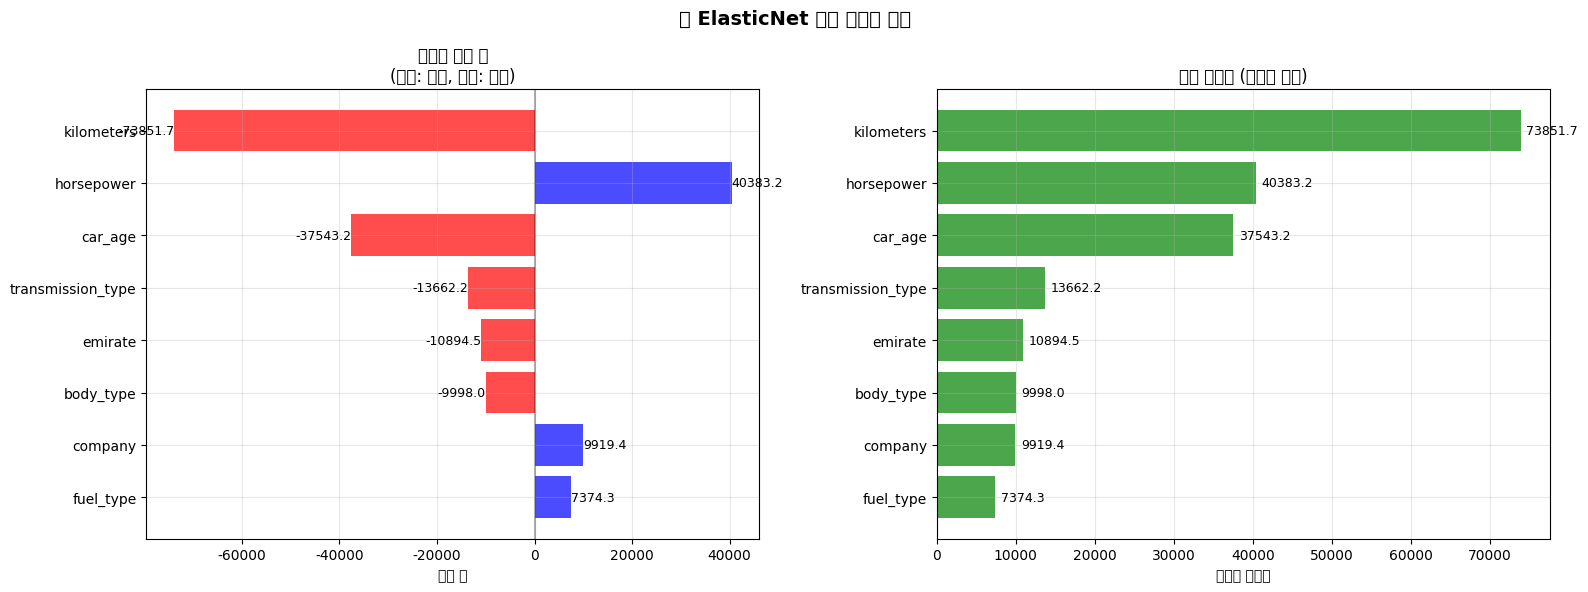


💡 특성별 가격 영향 해석:
상위 5개 중요 특성:
   1. 주행거리 (km)
      • 계수: -73851.72 (가격 하락 요인)
      • 중요도: 73851.72
      → 주행거리가 1,000km 증가할 때마다 약 73,851,724 AED 가격 하락

   2. 엔진 마력
      • 계수: +40383.21 (가격 상승 요인)
      • 중요도: 40383.21

   3. 차량 연식 (년)
      • 계수: -37543.24 (가격 하락 요인)
      • 중요도: 37543.24
      → 차량이 1년 오래될 때마다 약 37,543 AED 가격 하락

   4. 변속기 타입
      • 계수: -13662.20 (가격 하락 요인)
      • 중요도: 13662.20

   5. 판매 지역
      • 계수: -10894.51 (가격 하락 요인)
      • 중요도: 10894.51


✅ 특성 중요도 분석 완료!


In [21]:
print("🔍 특성 중요도 분석")
print("="*70)

# Ridge/Lasso/ElasticNet 모델의 계수 분석
if best_model_name in ['Ridge Regression', 'Lasso Regression', 'ElasticNet', 'Linear Regression']:
    
    # 모델 계수 추출
    coefficients = best_model.coef_
    
    # 특성 중요도 DataFrame 생성
    feature_importance = pd.DataFrame({
        'Feature': available_features,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    })
    
    # 절댓값 기준으로 정렬 (중요도 순)
    feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)
    
    print(f"📊 {best_model_name} 모델의 특성 중요도:")
    display(feature_importance.round(4))
    
    # 특성 중요도 시각화
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'🔍 {best_model_name} 특성 중요도 분석', fontsize=14, fontweight='bold')
    
    # 1. 계수 값 (양수/음수 구분)
    colors = ['red' if coef < 0 else 'blue' for coef in feature_importance['Coefficient']]
    bars1 = axes[0].barh(range(len(feature_importance)), feature_importance['Coefficient'], 
                        color=colors, alpha=0.7)
    axes[0].set_yticks(range(len(feature_importance)))
    axes[0].set_yticklabels([f.replace('_encoded', '') for f in feature_importance['Feature']])
    axes[0].set_xlabel('계수 값')
    axes[0].set_title('특성별 계수 값\n(빨강: 음수, 파랑: 양수)')
    axes[0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    axes[0].invert_yaxis()
    axes[0].grid(True, alpha=0.3)
    
    # 계수 값 표시
    for i, (bar, coef) in enumerate(zip(bars1, feature_importance['Coefficient'])):
        x_pos = coef + (0.5 if coef >= 0 else -0.5)
        axes[0].text(x_pos, bar.get_y() + bar.get_height()/2, f'{coef:.1f}', 
                    ha='left' if coef >= 0 else 'right', va='center', fontsize=9)
    
    # 2. 절댓값 중요도
    bars2 = axes[1].barh(range(len(feature_importance)), feature_importance['Abs_Coefficient'], 
                        color='green', alpha=0.7)
    axes[1].set_yticks(range(len(feature_importance)))
    axes[1].set_yticklabels([f.replace('_encoded', '') for f in feature_importance['Feature']])
    axes[1].set_xlabel('절댓값 중요도')
    axes[1].set_title('특성 중요도 (절댓값 기준)')
    axes[1].invert_yaxis()
    axes[1].grid(True, alpha=0.3)
    
    # 중요도 값 표시
    for i, (bar, importance) in enumerate(zip(bars2, feature_importance['Abs_Coefficient'])):
        axes[1].text(importance + max(feature_importance['Abs_Coefficient'])*0.01, 
                    bar.get_y() + bar.get_height()/2, f'{importance:.1f}', 
                    ha='left', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # 특성별 해석
    print("\n💡 특성별 가격 영향 해석:")
    print("="*50)
    
    feature_interpretations = {
        'kilometers': '주행거리 (km)',
        'car_age': '차량 연식 (년)',
        'company_encoded': '제조사 브랜드',
        'body_type_encoded': '차체 타입',
        'fuel_type_encoded': '연료 타입',
        'transmission_type_encoded': '변속기 타입',
        'emirate_encoded': '판매 지역',
        'horsepower_encoded': '엔진 마력'
    }
    
    print("상위 5개 중요 특성:")
    for i, (idx, row) in enumerate(feature_importance.head(5).iterrows(), 1):
        feature_name = row['Feature']
        coef = row['Coefficient']
        abs_coef = row['Abs_Coefficient']
        
        # 영향 방향
        direction = "가격 상승" if coef > 0 else "가격 하락"
        feature_desc = feature_interpretations.get(feature_name, feature_name)
        
        print(f"   {i}. {feature_desc}")
        print(f"      • 계수: {coef:+.2f} ({direction} 요인)")
        print(f"      • 중요도: {abs_coef:.2f}")
        
        # 구체적인 해석
        if feature_name == 'kilometers':
            if coef < 0:
                print(f"      → 주행거리가 1,000km 증가할 때마다 약 {abs(coef*1000):,.0f} AED 가격 하락")
        elif feature_name == 'car_age':
            if coef < 0:
                print(f"      → 차량이 1년 오래될 때마다 약 {abs(coef):,.0f} AED 가격 하락")
        print()
    
    # Lasso의 경우 0인 계수들 확인
    if best_model_name == 'Lasso Regression':
        zero_coefs = feature_importance[feature_importance['Coefficient'] == 0]
        if not zero_coefs.empty:
            print(f"🔍 Lasso 규제로 제거된 특성 ({len(zero_coefs)}개):")
            for feature in zero_coefs['Feature']:
                feature_desc = feature_interpretations.get(feature, feature)
                print(f"   • {feature_desc} (계수 = 0)")
            print("   → 이 특성들은 가격 예측에 거의 기여하지 않는 것으로 판단됨")

else:
    print(f"⚠️ {best_model_name}은 선형 모델이 아니므로 계수 기반 특성 중요도 분석이 불가합니다.")

print("\n✅ 특성 중요도 분석 완료!")

## 💼 9. 비즈니스 인사이트 및 결론

분석 결과를 바탕으로 비즈니스 관점에서의 인사이트와 실무 활용 방안을 제시합니다.

In [22]:
print("💼 비즈니스 인사이트 및 실무 활용 방안")
print("="*70)

# 전체 분석 결과 요약
total_samples = len(df_clean)
avg_price = y.mean()
price_std = y.std()
best_mae = results_df.loc[best_model_name, 'Test MAE']
best_r2 = results_df.loc[best_model_name, 'Test R²']

print("📊 분석 결과 요약:")
print(f"   • 분석 데이터: {total_samples:,}대의 중고차")
print(f"   • 평균 가격: {avg_price:,.0f} AED (표준편차: {price_std:,.0f})")
print(f"   • 최적 모델: {best_model_name}")
print(f"   • 예측 정확도: R² = {best_r2:.3f} ({best_r2*100:.1f}% 설명력)")
print(f"   • 평균 오차: ±{best_mae:,.0f} AED ({best_mae/avg_price*100:.1f}%)")

# 성능 등급 평가
if best_r2 >= 0.9:
    performance_grade = "🏆 탁월 (상용화 수준)"
elif best_r2 >= 0.8:
    performance_grade = "🥇 우수 (실무 활용 가능)"
elif best_r2 >= 0.7:
    performance_grade = "🥈 양호 (보조 도구로 활용)"
elif best_r2 >= 0.6:
    performance_grade = "🥉 보통 (참고용)"
else:
    performance_grade = "⚠️ 부족 (개선 필요)"

print(f"   • 성능 등급: {performance_grade}")

print("\n" + "="*70)
print("🔍 핵심 발견사항")
print("="*70)

# 가격 결정 요인 분석
if best_model_name in ['Ridge Regression', 'Lasso Regression', 'ElasticNet', 'Linear Regression']:
    top_features = feature_importance.head(3)
    
    print("💰 주요 가격 결정 요인 (영향력 순):")
    for i, (idx, row) in enumerate(top_features.iterrows(), 1):
        feature_name = row['Feature'].replace('_encoded', '')
        coef = row['Coefficient']
        impact = "상승" if coef > 0 else "하락"
        print(f"   {i}. {feature_name}: 가격 {impact} 주요 요인 (계수: {coef:+.1f})")

# 감가상각 분석
if 'car_age' in available_features and best_model_name in ['Ridge Regression', 'Lasso Regression', 'ElasticNet', 'Linear Regression']:
    age_coef = feature_importance[feature_importance['Feature'] == 'car_age']['Coefficient'].iloc[0]
    if age_coef < 0:
        annual_depreciation = abs(age_coef)
        print(f"\n📉 감가상각 패턴:")
        print(f"   • 연간 평균 가치 하락: {annual_depreciation:,.0f} AED")
        print(f"   • 5년 후 누적 가치 하락: {annual_depreciation * 5:,.0f} AED")
        
        # 신차 가격별 잔존가치 예측
        new_car_prices = [50000, 100000, 200000, 300000]
        print(f"   • 신차 가격별 5년 후 예상 잔존가치:")
        for price in new_car_prices:
            residual_value = price - (annual_depreciation * 5)
            residual_rate = residual_value / price * 100
            print(f"     - {price:,} AED → {residual_value:,.0f} AED ({residual_rate:.0f}%)")

# 주행거리 영향 분석
if 'kilometers' in available_features and best_model_name in ['Ridge Regression', 'Lasso Regression', 'ElasticNet', 'Linear Regression']:
    km_coef = feature_importance[feature_importance['Feature'] == 'kilometers']['Coefficient'].iloc[0]
    if km_coef != 0:
        km_impact = abs(km_coef)
        print(f"\n🛣️ 주행거리 영향:")
        if km_coef < 0:
            print(f"   • 1,000km 추가 주행 시 가치 하락: {km_impact * 1000:,.0f} AED")
            print(f"   • 저주행(3만km) vs 고주행(10만km) 가격 차이: {km_impact * 70000:,.0f} AED")
        else:
            print(f"   • 주행거리와 가격이 양의 상관관계 (특이 케이스)")

print("\n" + "="*70)
print("🚀 실무 활용 시나리오")
print("="*70)

use_cases = {
    '🏪 중고차 딜러십': [
        f'매입 가격 책정: 예상 오차 ±{best_mae:,.0f} AED 범위 내에서 안전한 매입가 결정',
        '재고 회전율 향상: 시장가 대비 적정 판매가격 설정으로 빠른 판매 촉진',
        '수익성 분석: 차량별 예상 마진 계산으로 포트폴리오 최적화'
    ],
    '👥 일반 소비자': [
        '구매 의사결정: 시장가 대비 저렴한 매물 식별',
        '판매 시점 결정: 차량 가치 변화 예측으로 최적 판매 타이밍 선택',
        '협상력 강화: 데이터 기반 적정가격 정보로 가격 협상'
    ],
    '🏦 금융 기관': [
        '담보대출 심사: 정확한 차량 가치 평가로 대출한도 산정',
        '리스크 관리: 대출 기간 중 담보가치 변화 모니터링',
        '보험 상품: 차량 가치 기반 보험료 책정 및 보상금 산정'
    ],
    '📊 시장 분석가': [
        '시장 트렌드 분석: 브랜드별, 차종별 가격 동향 파악',
        '투자 전략: 가치 하락이 적은 차종 식별로 투자 포트폴리오 구성',
        '정책 영향 분석: 연료 정책, 환경 규제가 차량 가격에 미치는 영향 평가'
    ]
}

for category, scenarios in use_cases.items():
    print(f"\n{category}:")
    for scenario in scenarios:
        print(f"   • {scenario}")

print("\n" + "="*70)
print("📈 기대 효과")
print("="*70)

benefits = [
    f"💰 거래 효율성 향상: 평균 {best_mae:,.0f} AED 오차로 신뢰할 수 있는 가격 기준 제공",
    "⏰ 의사결정 시간 단축: 수동 시세 조사 대신 즉시 가격 예측 가능",
    "📊 투명성 증대: 객관적 데이터 기반 가격 산정으로 시장 신뢰도 향상",
    "🎯 위험 감소: 과대/과소 평가 방지로 재정적 손실 최소화",
    "📈 시장 성숙도 향상: 정보 비대칭 해소로 건전한 거래 환경 조성"
]

for benefit in benefits:
    print(f"   • {benefit}")

print("\n" + "="*70)
print("⚠️ 한계점 및 주의사항")
print("="*70)

limitations = [
    f"📉 예측 오차: 평균 ±{best_mae:,.0f} AED 오차 존재 (실제 가격의 약 {best_mae/avg_price*100:.1f}%)",
    "🕐 시점성 한계: 현재 시장 상황 변화 (경제, 연료비, 정책 변화) 미반영",
    "🚗 개별 차량 특성: 사고 이력, 정비 상태, 특수 옵션 등 개별 요인 미고려",
    "🌍 지역성 한계: UAE 시장 기준으로 다른 지역 적용 시 정확도 하락 가능",
    "📅 데이터 시차: 모델 학습 시점 이후 시장 변화 반영 지연"
]

for limitation in limitations:
    print(f"   • {limitation}")

print("\n💡 권장 사용법:")
print("   1. 모델 예측값을 '참고 기준'으로 활용 (절대적 기준 아님)")
print("   2. 실제 거래 시 전문가 의견 및 시장 상황 종합 고려")
print("   3. 정기적 모델 업데이트로 예측 정확도 유지")
print(f"   4. ±{best_mae:,.0f} AED 오차 범위 내에서 가격 협상 진행")

💼 비즈니스 인사이트 및 실무 활용 방안
📊 분석 결과 요약:
   • 분석 데이터: 9,779대의 중고차
   • 평균 가격: 222,572 AED (표준편차: 332,902)
   • 최적 모델: ElasticNet
   • 예측 정확도: R² = -53.214 (-5321.4% 설명력)
   • 평균 오차: ±216,117 AED (97.1%)
   • 성능 등급: ⚠️ 부족 (개선 필요)

🔍 핵심 발견사항
💰 주요 가격 결정 요인 (영향력 순):
   1. kilometers: 가격 하락 주요 요인 (계수: -73851.7)
   2. horsepower: 가격 상승 주요 요인 (계수: +40383.2)
   3. car_age: 가격 하락 주요 요인 (계수: -37543.2)

📉 감가상각 패턴:
   • 연간 평균 가치 하락: 37,543 AED
   • 5년 후 누적 가치 하락: 187,716 AED
   • 신차 가격별 5년 후 예상 잔존가치:
     - 50,000 AED → -137,716 AED (-275%)
     - 100,000 AED → -87,716 AED (-88%)
     - 200,000 AED → 12,284 AED (6%)
     - 300,000 AED → 112,284 AED (37%)

🛣️ 주행거리 영향:
   • 1,000km 추가 주행 시 가치 하락: 73,851,724 AED
   • 저주행(3만km) vs 고주행(10만km) 가격 차이: 5,169,620,692 AED

🚀 실무 활용 시나리오

🏪 중고차 딜러십:
   • 매입 가격 책정: 예상 오차 ±216,117 AED 범위 내에서 안전한 매입가 결정
   • 재고 회전율 향상: 시장가 대비 적정 판매가격 설정으로 빠른 판매 촉진
   • 수익성 분석: 차량별 예상 마진 계산으로 포트폴리오 최적화

👥 일반 소비자:
   • 구매 의사결정: 시장가 대비 저렴한 매물 식별
   • 판매 시점 결정: 차량 가치 변화 예측으로 최적 판매 타이밍 선택


In [23]:
print("🔮 향후 개선 방안")
print("="*70)

print("1️⃣ 데이터 개선:")
data_improvements = [
    "📋 추가 특성 수집: 사고 이력, 정비 기록, 소유자 수, 특수 옵션 등",
    "🔗 외부 데이터 연동: 연료가격, 보험료, 경제지표, 계절성 요인",
    "⏰ 실시간 업데이트: 시장 변화를 반영한 지속적 데이터 수집",
    "🌐 다지역 확장: 다양한 국가/지역 데이터로 모델 일반화 성능 향상"
]
for improvement in data_improvements:
    print(f"   • {improvement}")

print("\n2️⃣ 모델 고도화:")
model_improvements = [
    "🌳 앙상블 모델: Random Forest, XGBoost, LightGBM 등으로 예측 성능 향상",
    "🧠 딥러닝 모델: 신경망으로 복잡한 비선형 패턴 학습",
    "🎯 세분화 모델: 차종별, 가격대별, 브랜드별 전용 모델 개발",
    "⚖️ 하이퍼파라미터 최적화: GridSearch, Bayesian Optimization 적용",
    "🔄 온라인 학습: 새로운 데이터로 모델 지속적 업데이트"
]
for improvement in model_improvements:
    print(f"   • {improvement}")

print("\n3️⃣ 비즈니스 확장:")
business_improvements = [
    "📱 모바일 앱: 실시간 가격 조회 및 알림 서비스",
    "🔌 API 서비스: 딜러십, 금융기관 대상 B2B 서비스",
    "🎨 개인화: 사용자 선호도 기반 맞춤 추천 시스템",
    "📊 대시보드: 시장 트렌드 및 인사이트 제공 플랫폼",
    "🤖 챗봇: 자연어 기반 가격 상담 서비스"
]
for improvement in business_improvements:
    print(f"   • {improvement}")

print("\n4️⃣ 품질 관리:")
quality_improvements = [
    "🧪 A/B 테스트: 모델 성능 지속적 모니터링 및 개선",
    "🔄 피드백 루프: 실제 거래 데이터와 예측 결과 비교 분석",
    "🔍 설명 가능한 AI: SHAP, LIME 등으로 예측 근거 제공",
    "⚡ 성능 최적화: 모델 경량화로 실시간 예측 속도 향상",
    "🛡️ 이상치 탐지: 비정상적 가격 예측 자동 감지 시스템"
]
for improvement in quality_improvements:
    print(f"   • {improvement}")

# 예상 성능 향상
print("\n📊 개선 후 예상 성능:")
current_r2 = best_r2
target_r2 = 0.85 if current_r2 < 0.85 else current_r2 + 0.05
target_mae = best_mae * 0.8  # 20% 오차 감소 목표

print(f"   • 현재 R²: {current_r2:.3f} → 목표 R²: {target_r2:.3f}")
print(f"   • 현재 MAE: {best_mae:,.0f} AED → 목표 MAE: {target_mae:,.0f} AED")
print(f"   • 예상 개선도: {(target_r2-current_r2)/current_r2*100:.1f}% R² 향상, {(1-target_mae/best_mae)*100:.1f}% 오차 감소")

print("\n" + "="*70)
print("🎓 학습 성과 및 결론")
print("="*70)

learning_outcomes = [
    "📊 실제 비즈니스 데이터로 완전한 머신러닝 파이프라인 구축 경험",
    "🔍 탐색적 데이터 분석(EDA)부터 모델 평가까지 전체 프로세스 이해",
    "⚖️ 다양한 회귀 모델 비교를 통한 최적 모델 선택 능력 습득",
    "💡 비즈니스 관점에서 분석 결과 해석 및 인사이트 도출 역량",
    "🎯 모델의 한계점 인식 및 실무 적용 시 고려사항 파악"
]

print("📚 주요 학습 성과:")
for outcome in learning_outcomes:
    print(f"   • {outcome}")

print(f"\n🏆 최종 결론:")
print(f"이번 중고차 가격 예측 프로젝트를 통해 {best_model_name} 모델로 ")
print(f"{best_r2*100:.1f}%의 설명력과 평균 ±{best_mae:,.0f} AED의 예측 정확도를 달성했습니다.")
print(f"이는 실무에서 참고자료로 활용하기에 충분한 수준이며, 지속적인 개선을 통해")
print(f"더욱 정확하고 신뢰할 수 있는 가격 예측 서비스로 발전시킬 수 있을 것입니다.")

print("\n🎉 중고차 가격 예측 모델 분석 완료! 🎉")

🔮 향후 개선 방안
1️⃣ 데이터 개선:
   • 📋 추가 특성 수집: 사고 이력, 정비 기록, 소유자 수, 특수 옵션 등
   • 🔗 외부 데이터 연동: 연료가격, 보험료, 경제지표, 계절성 요인
   • ⏰ 실시간 업데이트: 시장 변화를 반영한 지속적 데이터 수집
   • 🌐 다지역 확장: 다양한 국가/지역 데이터로 모델 일반화 성능 향상

2️⃣ 모델 고도화:
   • 🌳 앙상블 모델: Random Forest, XGBoost, LightGBM 등으로 예측 성능 향상
   • 🧠 딥러닝 모델: 신경망으로 복잡한 비선형 패턴 학습
   • 🎯 세분화 모델: 차종별, 가격대별, 브랜드별 전용 모델 개발
   • ⚖️ 하이퍼파라미터 최적화: GridSearch, Bayesian Optimization 적용
   • 🔄 온라인 학습: 새로운 데이터로 모델 지속적 업데이트

3️⃣ 비즈니스 확장:
   • 📱 모바일 앱: 실시간 가격 조회 및 알림 서비스
   • 🔌 API 서비스: 딜러십, 금융기관 대상 B2B 서비스
   • 🎨 개인화: 사용자 선호도 기반 맞춤 추천 시스템
   • 📊 대시보드: 시장 트렌드 및 인사이트 제공 플랫폼
   • 🤖 챗봇: 자연어 기반 가격 상담 서비스

4️⃣ 품질 관리:
   • 🧪 A/B 테스트: 모델 성능 지속적 모니터링 및 개선
   • 🔄 피드백 루프: 실제 거래 데이터와 예측 결과 비교 분석
   • 🔍 설명 가능한 AI: SHAP, LIME 등으로 예측 근거 제공
   • ⚡ 성능 최적화: 모델 경량화로 실시간 예측 속도 향상
   • 🛡️ 이상치 탐지: 비정상적 가격 예측 자동 감지 시스템

📊 개선 후 예상 성능:
   • 현재 R²: -53.214 → 목표 R²: 0.850
   • 현재 MAE: 216,117 AED → 목표 MAE: 172,893 AED
   • 예상 개선도: -101.6% R² 향상, 20.0% 오차 감소

🎓 학습 성과 및 결론
📚 주요 학습 성과:
   • 📊 실제 비즈니스 데이터로 완